<a href="https://colab.research.google.com/github/muhammad-usama-aleem/CIFAR-10-Classification/blob/main/CIFAR_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **download kaggle data in Google Colab**

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadusamaaleem","key":"3b2e950552655988d4fdf23154db29ee"}'}

In [14]:
# Make directory named kaggle and copy kaggle.json file there.

!mkdir ~/kaggle
!cp kaggle.json ~/kaggle/

In [15]:
!chmod 600 /content/kaggle/kaggle.json

In [16]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries    3KB  2022-01-15 07:06:09           3649  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                       3GB  2022-02-05 20:51:56            916  
yasserh/wine-quality-dataset                                Wine Quality Dataset                              21KB  2022-01-15 19:15:11           3808  
majyhain/height-of-male-and-female-by-country-2022          Height of Male and Female by Country 2022          4KB  2022-02-02 00:40:19           1293  
sanjeetsinghnaik/top-1000-highest-grossing-movies           Top 1000 Highest Gross

In [17]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 340M/346M [00:12<00:00, 33.7MB/s]
100% 346M/346M [00:12<00:00, 28.5MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [19]:
# removing zip file
!rm -rf /content/intel-image-classification.zip

# **Importing Libraies**

In [20]:
import tensorflow as tf
import time

# use this command to allow growth of the memory and this prevent error.
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# if error is 'Physical error cannot be modified after being initailized', then restart kernel.

# **Load Data**

In [27]:
from tensorflow.keras import datasets

# importing cfiar dataset 
# (train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

# **Preprocessing**

In [28]:
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150

In [29]:
TRAIN_DIR = "/content/seg_train/seg_train"

In [30]:
# splitting into train and validation 
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.15, # seprating 15% of train dataset for validation 
    subset='training',
    seed=124, # give any non negative number to split the dataset into valid and split
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = 32
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.15,
    subset='validation',
    seed=124,
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = 32
)

Found 14034 files belonging to 6 classes.
Using 11929 files for training.
Found 14034 files belonging to 6 classes.
Using 2105 files for validation.


In [32]:
class_names = train_data.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

# **Visualizing data set**

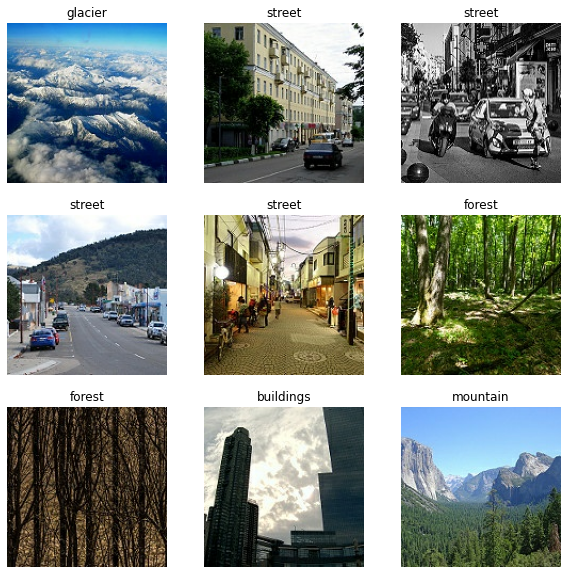

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# **Model**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes = 6

model = Sequential([
  # first layer is used for normalization
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [40]:
start = time.time()
model.fit(train_data, 
          epochs=5, 
          batch_size=25)
stop = time.time()

Epoch 1/5
373/373 [==============================] - 21s 32ms/step - loss: 0.9812 - accuracy: 0.6198
Epoch 2/5
373/373 [==============================] - 11s 31ms/step - loss: 0.6249 - accuracy: 0.7714
Epoch 3/5
373/373 [==============================] - 12s 31ms/step - loss: 0.5017 - accuracy: 0.8230
Epoch 4/5
373/373 [==============================] - 11s 30ms/step - loss: 0.4067 - accuracy: 0.8570
Epoch 5/5
373/373 [==============================] - 12s 31ms/step - loss: 0.3166 - accuracy: 0.8844


In [41]:
print(f"Training time: {stop - start}s")

Training time: 105.61475229263306s


# **Evaluation**

In [42]:
model.evaluate(val_data)

66/66 [==============================] - 2s 27ms/step - loss: 0.5528 - accuracy: 0.8204


[0.5527774095535278, 0.8204275369644165]

# **Save Model**

In [43]:
model.save("inetlenv")

INFO:tensorflow:Assets written to: inetlenv/assets


# **Load Model**

In [44]:
import tensorflow as tf
import cv2
import numpy as np


my_model = tf.keras.models.load_model("/content/inetlenv")

image = cv2.imread(TRAIN_DIR + "/forest/8.jpg")
resp = model.predict(np.expand_dims(image, axis=0))
class_names[np.argmax(resp)]

'forest'